In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#normalize input data
# x_norm=normalize(x_train)

In [4]:
# Step 1
# Build a Dense ANN with five hidden layers of 25 neurons each
m = Sequential()
m.add(Flatten(input_shape=(28, 28)))
m.add(Dense(units=25, activation='relu'))
m.add(BatchNormalization())
m.add(Dense(units=25, activation='relu'))
m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dropout(0.5))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Add a softmax output layer with ten neurons
m.add(Dense(units=10, activation='softmax'))

In [6]:
# Step 2
# Train the model with optimizer='adam'
m.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [7]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
batch_normalization (BatchNo (None, 25)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 20,735
Trainable params: 20,635
Non-trainable params: 100
__________________________________________________

In [8]:
# Use a batch size of at least 500. Run 100 epochs.
h= m.fit(x_train, to_categorical(y_train), epochs=50, validation_split=0.2, batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 45us/sample - loss: 0.5549 - acc: 0.8450 - val_loss: 0.2497 - val_acc: 0.9296
Epoch 2/50
48000/48000 [==============================] - 2s 35us/sample - loss: 0.2191 - acc: 0.9348 - val_loss: 0.1841 - val_acc: 0.9451
Epoch 3/50
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1657 - acc: 0.9509 - val_loss: 0.1636 - val_acc: 0.9510
Epoch 4/50
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1411 - acc: 0.9582 - val_loss: 0.1538 - val_acc: 0.9533
Epoch 5/50
48000/48000 [==============================] - 2s 39us/sample - loss: 0.1240 - acc: 0.9622 - val_loss: 0.1433 - val_acc: 0.9561
Epoch 6/50
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1129 - acc: 0.9655 - val_loss: 0.1469 - val_acc: 0.9549
Epoch 7/50
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1034 - acc: 0.9678 - val_loss: 0.

In [9]:
# What accuracy do you reach?
print(sum(h.history['loss'])/len(h.history['loss']))
print(sum(h.history['val_loss'])/len(h.history['val_loss']))

0.07099953572925613
0.14970847631292417


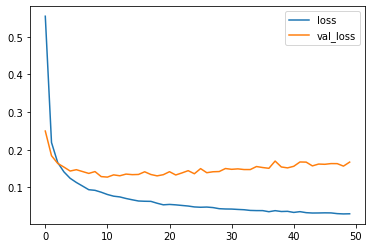

In [10]:
# Is the network overfitting?
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [11]:
# Step 3
# Add Early Stopping. After how many epochs does it stop?
# stopping = EarlyStopping(min_delta=0.02, patience=10)
# h= m.fit(x_norm, to_categorical(y_train), epochs=100, validation_split=0.2, batch_size=500,callbacks=[stopping])

In [12]:
# Step 4
# Add Batch Normalization to every layer.
# Compare the learning curves: is it converging faster than before?
# Is it still overfitting?

In [13]:
score = m.evaluate(x_train, to_categorical(y_train), batch_size=100)
print(score)

60000/60000 [==============================] - 1s 15us/sample - loss: 0.0461 - acc: 0.9885
[0.04614085119925827, 0.9884833]


In [15]:
# prediction on new data points
print(m.predict(x_train[:10]))

[[5.17046850e-10 3.25645217e-08 6.62028210e-11 1.62860277e-04
  4.41890621e-12 9.99837160e-01 5.82330451e-09 1.09106135e-09
  2.56109695e-13 2.34577253e-11]
 [1.00000000e+00 1.19927659e-08 4.67810723e-09 2.28738872e-09
  5.15668133e-11 1.83595739e-09 1.24795934e-08 3.30393419e-08
  4.19585255e-09 1.83801763e-09]
 [1.06515350e-12 2.48306264e-06 2.19975253e-11 1.70097070e-09
  9.99997497e-01 6.25868732e-11 4.98102705e-11 4.07335515e-13
  1.40019258e-16 1.15149630e-13]
 [2.92687342e-13 9.99999166e-01 1.15653343e-07 1.47238360e-10
  1.21340238e-09 6.42452314e-10 1.37918010e-10 6.91836021e-07
  3.29938299e-09 7.49521430e-14]
 [2.20033716e-08 1.18553703e-06 7.66858399e-09 1.91997842e-05
  6.85059349e-05 2.74784725e-06 3.77088156e-08 3.07455950e-04
  2.37504355e-05 9.99577105e-01]
 [2.60446908e-09 6.61315317e-12 1.00000000e+00 3.87763224e-11
  1.27756946e-14 2.99506797e-09 5.99011596e-09 9.47174517e-09
  1.96391490e-08 7.28775262e-10]
 [1.68598957e-09 9.99997377e-01 2.30911542e-06 7.47469429e

In [16]:
pred_bin = m.predict(x_test[:10])

In [17]:
pred = [np.argmax(p) for p in pred_bin]

In [18]:
print(pred, y_test[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] [7 2 1 0 4 1 4 9 5 9]
